In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point

# for qqplot
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
# for adding some text in plot
from matplotlib.offsetbox import AnchoredText

# for train test split, for cross validation, and for measure
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error as MSE
# for data standard scaler
from sklearn.preprocessing import StandardScaler

# for Multiple linear regression
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

# for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

In [2]:
import libpysal
import mgwr
import esda
from mgwr.gwr import GWR, MGWR
from matplotlib import colors
import spreg

# MSOA shapefile data

In [3]:
msoa_ew_shp_url = "https://github.com/ShengAric92/CASA0010_dissertation/raw/main/MSOA_data/shapefile/England/MSOA_EngWal_Dec_2011_Generalised_ClippedEW_0/Middle_Layer_Super_Output_Areas_December_2011_Generalised_Clipped_Boundaries_in_England_and_Wales.shp"
msoa_ew_shp = gpd.read_file(msoa_ew_shp_url)

In [4]:
msoa_england_shp = msoa_ew_shp[msoa_ew_shp['msoa11cd'].str.startswith("E")]

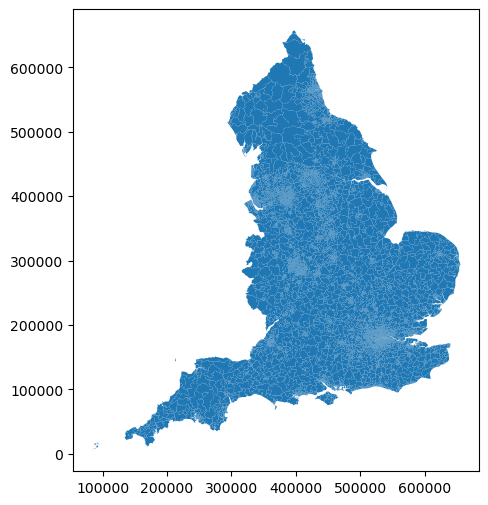

In [5]:
f, axes = plt.subplots(1, 1, figsize=(6, 6))
msoa_england_shp.plot(ax=axes)
plt.show()

# Region and MSOA plot

In [13]:
uk_region = gpd.read_file("/Users/shengaric/Desktop/georef-united-kingdom-region/georef-united-kingdom-region-millesime.shp")
uk_region = uk_region.to_crs(epsg=27700)

eng_region = uk_region[uk_region['ctry_code'].str.contains("E")]

eng_region.loc[:, 'rgn_name'] = eng_region['rgn_name'].str.strip("[]").str.replace("'", "")

In [14]:
eng_region

,year,ctry_code,ctry_name,rgn_code,rgn_name,rgn_area_co,rgn_type,geometry
0,2022,['E92000001'],['England'],['E12000002'],North West,GBR,region,"MULTIPOLYGON (((318617.301 467088.835, 319319...."
1,2022,['E92000001'],['England'],['E12000006'],East of England,GBR,region,"MULTIPOLYGON (((583533.751 185582.550, 583629...."
2,2022,['E92000001'],['England'],['E12000007'],London,GBR,region,"POLYGON ((553156.570 175519.807, 553184.397 17..."
3,2022,['E92000001'],['England'],['E12000005'],West Midlands,GBR,region,"POLYGON ((445790.300 252455.405, 445663.103 25..."
4,2022,['E92000001'],['England'],['E12000004'],East Midlands,GBR,region,"MULTIPOLYGON (((552915.124 326370.414, 552598...."
6,2022,['E92000001'],['England'],['E12000003'],Yorkshire and The Humber,GBR,region,"MULTIPOLYGON (((495603.100 422511.497, 496102...."
7,2022,['E92000001'],['England'],['E12000001'],North East,GBR,region,"MULTIPOLYGON (((408764.568 644949.215, 409475...."
8,2022,['E92000001'],['England'],['E12000009'],South West,GBR,region,"MULTIPOLYGON (((87795.451 8849.150, 88606.132 ..."
10,2022,['E92000001'],['England'],['E12000008'],South East,GBR,region,"MULTIPOLYGON (((448615.801 96641.300, 449349.3..."


In [15]:
msoa_england_shp

,objectid,msoa11cd,msoa11nm,msoa11nmw,st_areasha,st_lengths,geometry
0,1,E02000001,City of London 001,City of London 001,2.905399e+06,9024.059703,"MULTIPOLYGON (((532136.950 182198.368, 532160...."
1,2,E02000002,Barking and Dagenham 001,Barking and Dagenham 001,2.165634e+06,8152.697593,"POLYGON ((548883.435 190845.558, 548882.997 19..."
2,3,E02000003,Barking and Dagenham 002,Barking and Dagenham 002,2.143565e+06,9118.449453,"POLYGON ((549104.294 189324.880, 548956.354 18..."
3,4,E02000004,Barking and Dagenham 003,Barking and Dagenham 003,2.490215e+06,8207.610394,"POLYGON ((551551.892 187364.909, 551479.898 18..."
4,5,E02000005,Barking and Dagenham 004,Barking and Dagenham 004,1.186180e+06,6964.961665,"POLYGON ((549101.500 187656.302, 549163.242 18..."
...,...,...,...,...,...,...,...
6786,6787,E02006930,Greenwich 037,Greenwich 037,8.678832e+05,7693.140533,"POLYGON ((539554.296 178604.153, 539534.818 17..."
6787,6788,E02006931,Greenwich 038,Greenwich 038,1.986049e+06,8625.942313,"POLYGON ((538836.564 177736.860, 538882.059 17..."
6788,6789,E02006932,Liverpool 060,Liverpool 060,1.470333e+06,12336.973288,"POLYGON ((335717.045 391200.846, 335752.226 39..."
6789,6790,E02006933,Liverpool 061,Liverpool 061,1.626018e+06,9440.159823,"POLYGON ((335061.510 390303.175, 335079.030 39..."


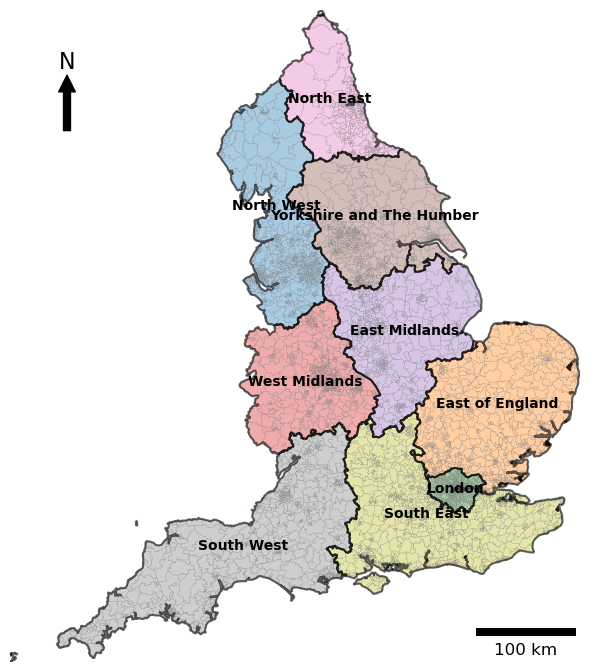

In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

# 读取 shapefile 文件
msoa_gdf = msoa_england_shp
region_gdf = eng_region

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(6, 8))

# 绘制 MSOA 边界
msoa_gdf.boundary.plot(ax=ax, linewidth=0.1, color='gray')

# 绘制区域边界并添加标签
region_gdf.boundary.plot(ax=ax, linewidth=1.5, color='black', alpha=0.6)
for idx, row in region_gdf.iterrows():
    ax.annotate(text=row['rgn_name'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                ha='center', va='center', fontsize=10, fontweight='bold', color='black')

# 设置地图范围
ax.set_xlim(region_gdf.total_bounds[0], region_gdf.total_bounds[2])
ax.set_ylim(region_gdf.total_bounds[1], region_gdf.total_bounds[3])


# 添加指北针
def add_north_arrow(ax, x=0.1, y=0.9, arrow_length=0.085):
    ax.annotate('N', xy=(x, y), xytext=(x, y + 0.02),
                ha='center', va='center', fontsize=16, xycoords='axes fraction')
    
    ax.annotate('', xy=(x, y), xytext=(x, y - 0.085),
                arrowprops=dict(facecolor='black', width=5, headwidth=12),
                ha='center', va='center', fontsize=12, xycoords='axes fraction')

add_north_arrow(ax)

# 添加比例尺
ax.add_artist(ScaleBar(dx=1, units="m", location="lower right",
                       width_fraction=0.012, font_properties={'size': 12}))

# 添加颜色
color_map = plt.cm.get_cmap('tab10')
region_colors = [color_map(i) for i in range(len(region_gdf))]
region_gdf.plot(ax=ax, color=region_colors, alpha=0.38, edgecolor='none')


# 设置标题
# plt.title("England Regions and MSOA Boundaries", fontsize=16)

# 移除坐标轴
ax.axis('off')

# 显示地图
plt.tight_layout()
plt.show()

# MSOA All data

In [79]:
Vardata_url = "/Users/shengaric/Desktop/CASA0010 Dissertation/MSOA_data/All_msoa_data/msoa_all_data.csv"
Vardata = pd.read_csv(Vardata_url)

In [80]:
Varshp = pd.merge(msoa_england_shp, Vardata, how='left', left_on='msoa11cd', right_on='MSOA11CD')

## Prevalence plot

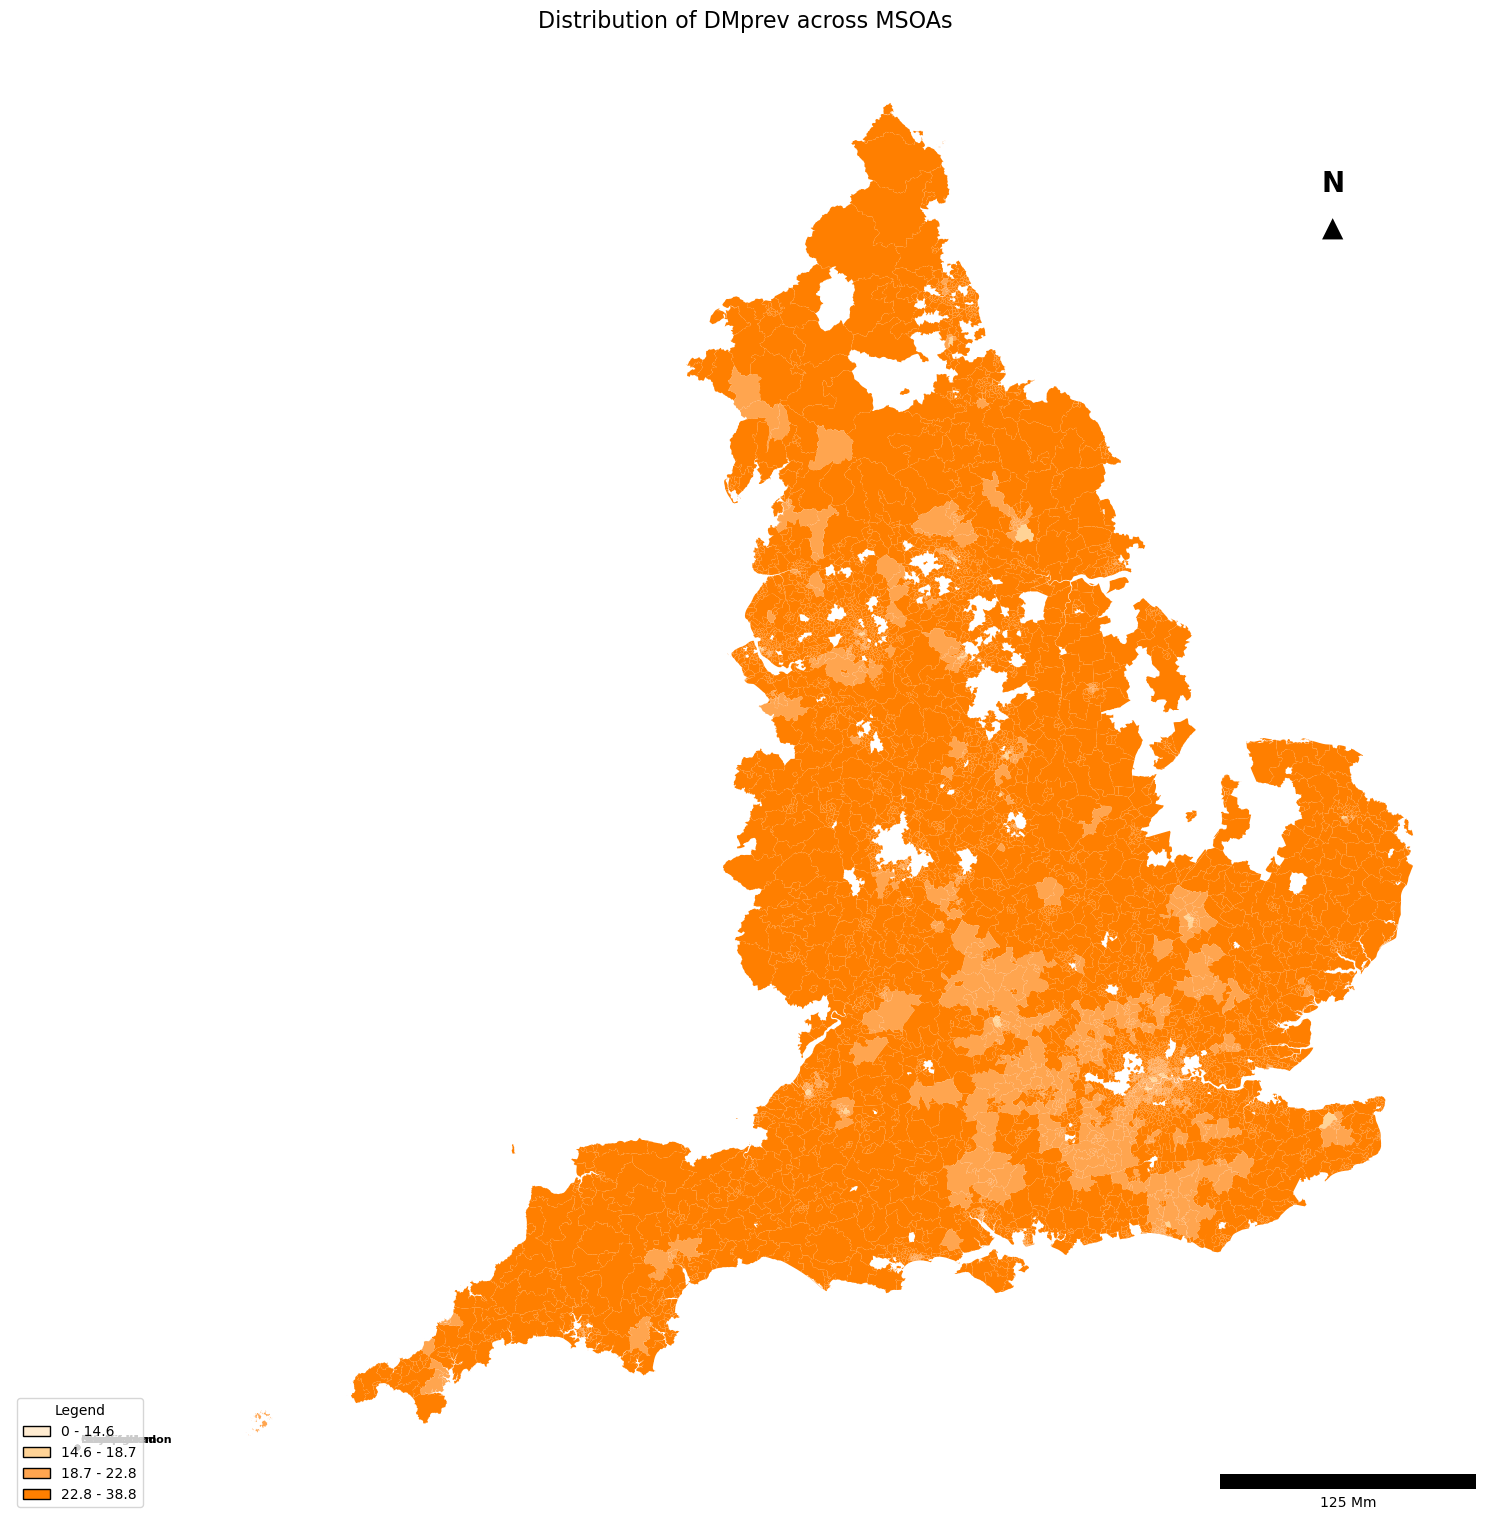

In [83]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


# 合并数据（假设有一个共同的MSOA代码列）
merged_data = Varshp

# 选择要绘制的变量
variable = 'DMprev'

# 定义区间和对应的颜色
bins = [0, 0.5, 3, 6, 9]
labels = ['0 - 14.6', '14.6 - 18.7', '18.7 - 22.8', '22.8 - 38.8']
colors = ['#ffecd1', '#ffd396', '#ffa54f', '#ff7f00']

# 根据区间分类数据
merged_data['category'] = pd.cut(merged_data[variable], bins=bins, labels=labels, include_lowest=True)

# 创建图形
fig, ax = plt.subplots(figsize=(15, 20))

# 绘制地图
merged_data.plot(column='category', ax=ax, legend=False, categorical=True, cmap=plt.cm.colors.ListedColormap(colors))

# 添加城市标记
cities = {
    'Newcastle': (-1.61778, 54.97328),
    'Leeds': (-1.54785, 53.79648),
    'Liverpool': (-2.98356, 53.40977),
    'Sheffield': (-1.47008, 53.38297),
    'Birmingham': (-1.89983, 52.48142),
    'Bristol': (-2.58791, 51.45451),
    'City of London': (-0.09184, 51.51279)
}

for city, coords in cities.items():
    ax.annotate(city, xy=coords, xytext=(3, 3), textcoords="offset points", fontsize=8, fontweight='bold')
    ax.plot(coords[0], coords[1], 'ko', markersize=3)


# 创建图例
legend_elements = [Patch(facecolor=color, edgecolor='black', label=label) 
                   for color, label in zip(colors, labels)]
ax.legend(handles=legend_elements, title='Legend', loc='lower left', fontsize=10)

# 设置标题
# plt.title(f'Distribution of {variable} across MSOAs', fontsize=16)

plt.tight_layout()
plt.show()

<AxesSubplot:>

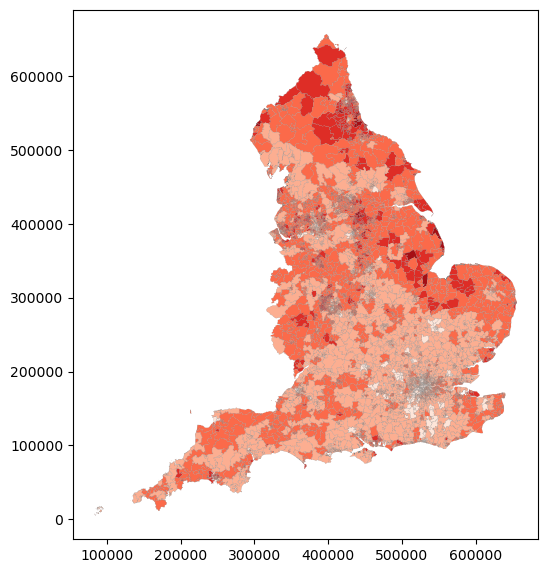

In [88]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from matplotlib_scalebar.scalebar import ScaleBar

shp_data = Varshp
# 创建 5 个等间隔的区间
bins = np.linspace(shp_data.OBprev.min(), shp_data.OBprev.max(), 6)
labels = [f'{bins[i]:.1f} - {bins[i+1]:.1f}' for i in range(5)]

# 将数据分类到这些区间
shp_data['obprev_cat'] = pd.cut(shp_data.OBprev, bins=bins, labels=labels, include_lowest=True)

# 创建自定义的颜色映射
colors = ['#fee5d9', '#fcae91', '#fb6a4a', '#de2d26', '#a50f15']
cmap = LinearSegmentedColormap.from_list("custom", colors, N=5)

# 创建图形
fig, ax = plt.subplots(figsize=(6, 8))

# 绘制地图
shp_data.plot('obprev_cat', 
              categorical=True,
              cmap=cmap,
              legend=False,
              ax=ax,
              edgecolor='gray',
              linewidth=0.1)

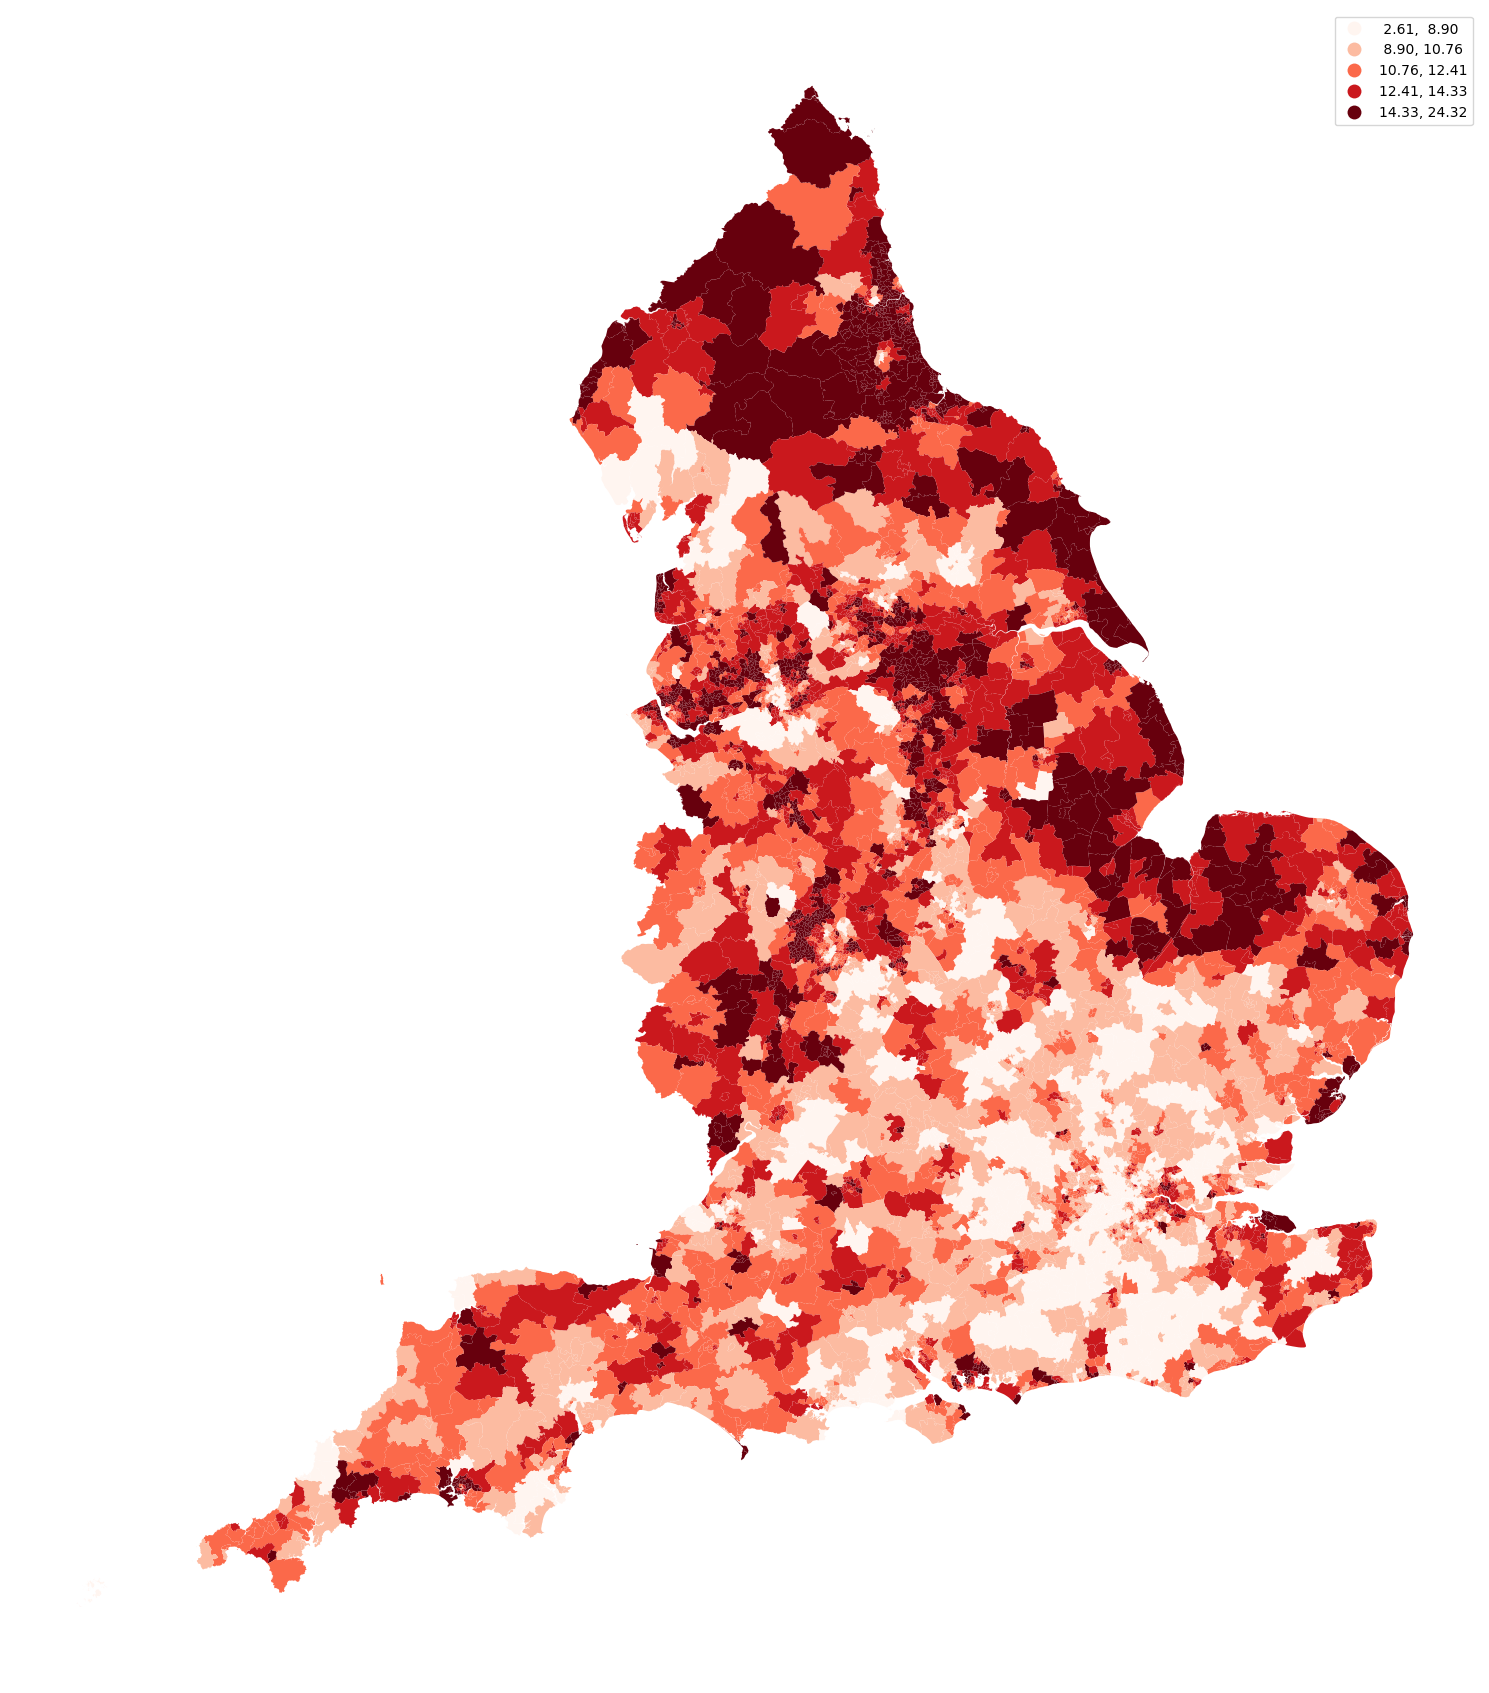

In [95]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 假设 shp_data 已经加载并包含 'OBprev' 列

fig, ax = plt.subplots(figsize=(15, 20))

# 使用 geopandas 的 plot 函数绘图
shp_data.plot(column='OBprev',
              scheme='quantiles',  # 或者 'equal_interval', 'natural_breaks'
              k=5,  # 分成 5 类
              cmap='Reds',
              legend=True,
              ax=ax)

# # 手动添加图例标题
# cbar = ax.get_figure().get_axes()[1]
# cbar.set_title("Obesity Prevalence (%)", fontsize=12)

# 设置标题
# plt.title('Distribution of Obesity Prevalence across MSOAs', fontsize=16)

# 移除坐标轴
ax.axis('off')

plt.tight_layout()
plt.show()



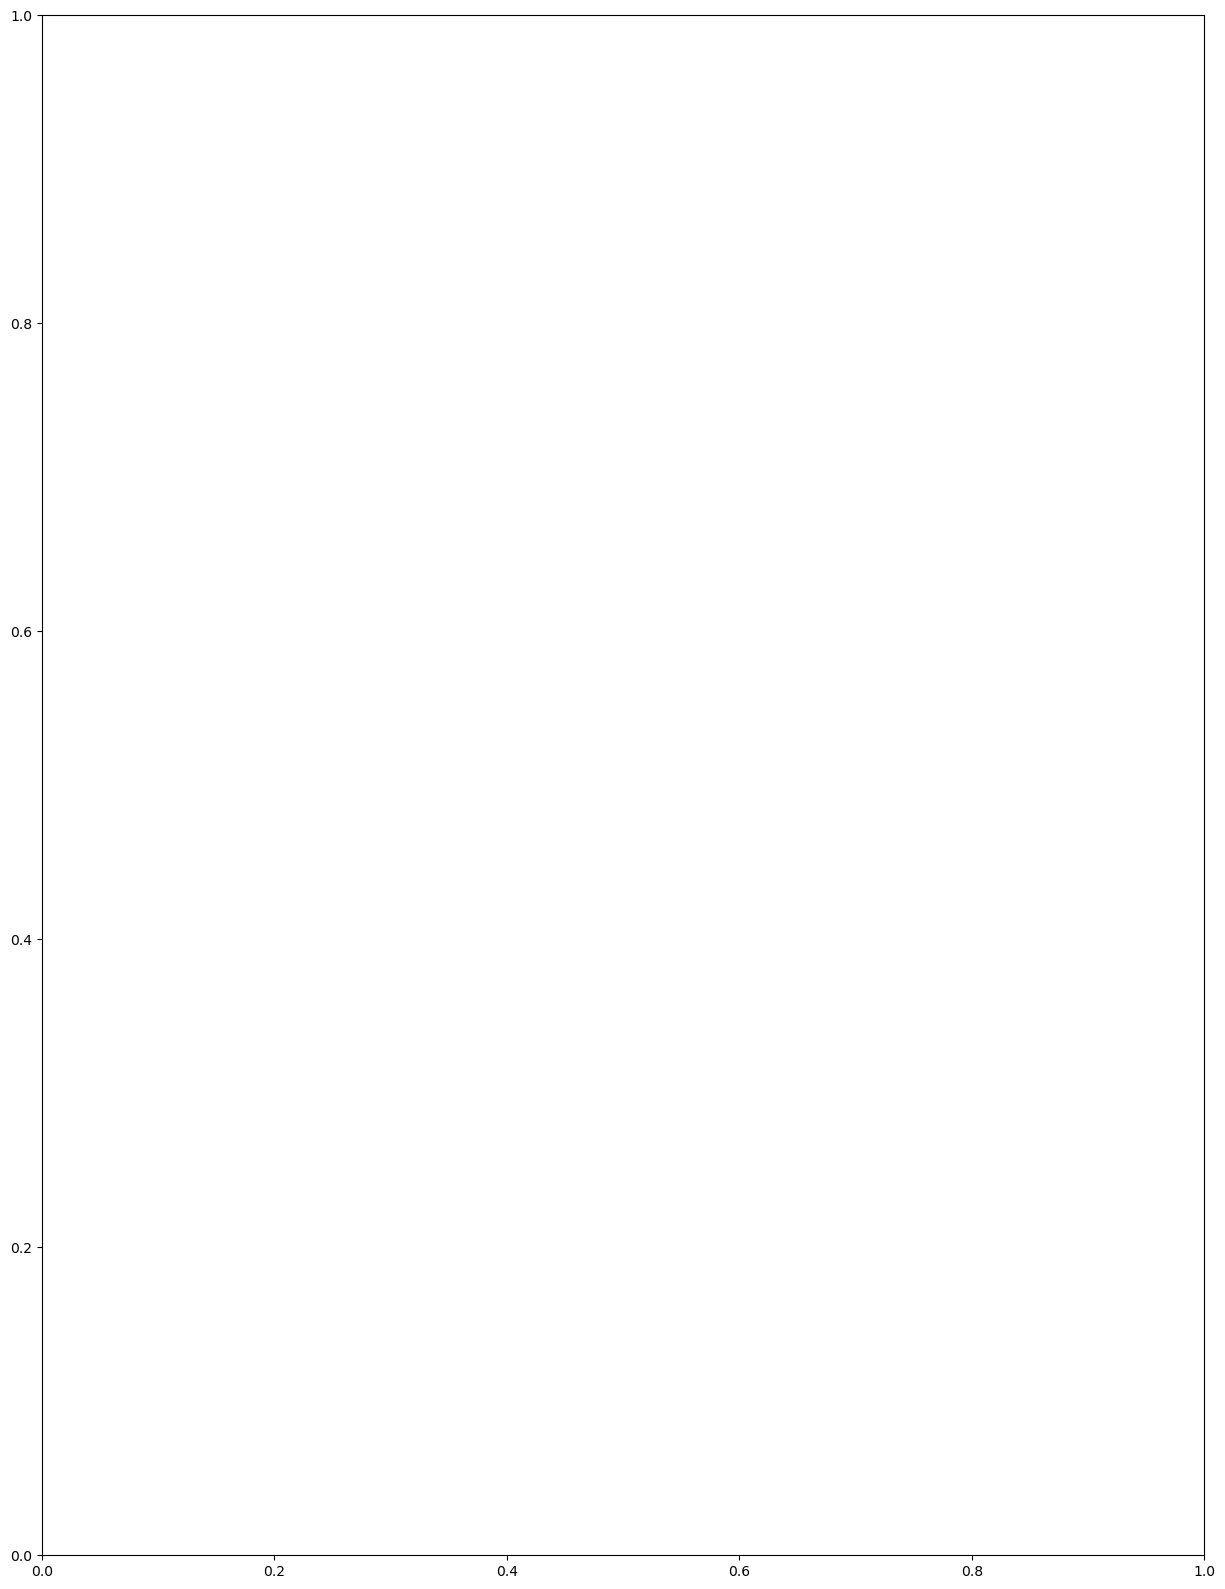

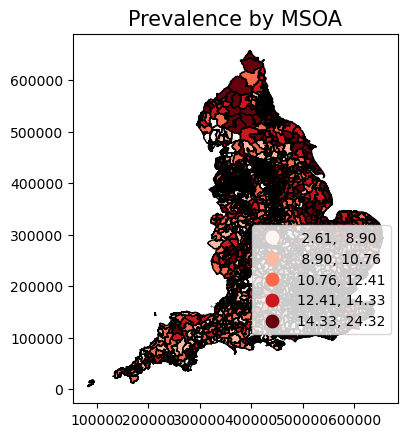

In [90]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify

fig, ax = plt.subplots(figsize=(15, 20))

# 假设你已经读取了 shapefile，并且 shp_data 是你的 GeoDataFrame
# shp_data = gpd.read_file("path_to_your_shapefile.shp")

# 定义分类方案（例如，使用 Quantiles 分层）
scheme = mapclassify.Quantiles(shp_data['OBprev'], k=5)

# 使用 geopandas 的 plot 函数绘图，并显示分类图例
ax = shp_data.plot(column='OBprev',
                   cmap='Reds',
                   scheme='Quantiles',  # 也可以使用 'EqualInterval', 'FisherJenks' 等
                   legend=True,
                   classification_kwds={'k': 5},  # 定义分层数
                   edgecolor='black')

# 添加标题和调整图例
ax.set_title("Prevalence by MSOA", fontsize=15)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))

# 显示图形
plt.show()